## **Оглавление**

### **[Введение](#1)**
### **1. [Обзор данных](#2)**  
### **2. [Предобработка данных](#3)**  
    2.1 Изменение названий столбцов
    2.2 Обработка некорректных значений
    2.3 Обработка пропусков
    2.4 Изменение типов данных
    2.5 Обработка дубликатов
    2.6 Подготовка данных
### 4. [Исследовательский анализ данных](#4)
    3.1 Продажи по платформам
    3.2 Распределение игр по жанрам
    3.3 Портрет пользователя каждого региона
    3.4 Влияние рейтинга ESRB на продажи в отдельном регионе
### 5. [Проверка гипотез](#9)
### **[Итоги исследования](#10)**

# Сборный проект: изучение рынка компьютерных игр

## Введение  <a id='1'></a>

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Чтобы сделать ставку на потенциально популярный продукт и спланировать рекламные кампании, нам нужно выявить определяющие успешность игры закономерности.  

**Цели:**
1. Провести исследовательский анализ данных;  
2. На основе анализа проверить гопотезы:  
    - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;  
    - Средние пользовательские рейтинги жанров Action и Sports разные.  

Из открытых источников доступны исторические данные о продажах игр до 2016 года, оценки пользователей и экспертов, жанры и платформы.  

Исследование проводится в четыре этапа:  

1. Обзор данных  
2. Предобработка данных    
3. Исследовательский анализ данных  
4. Проверки гипотез  

## Обзор данных  <a id='2'></a>

Ознакомимся с входными данными.

In [79]:
#импортируем библиотеки

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt   

from scipy import stats as st

import seaborn as sns

In [80]:
import warnings

warnings.filterwarnings('ignore') #игнорируем предупреждения

Прочитаем файл с данными.

In [81]:
#прочитаем файл с данными и сохраним его в переменной data
data = pd.read_csv('/datasets/games.csv')

display(data.head()) #выведем на экран первые 5 строк таблицы
display(data.info()) #получим общую информацию о таблице

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Согласно документации к данным:  

- Name — название игры  
- Platform — платформа  
- Year_of_Release — год выпуска  
- Genre — жанр игры  
- NA_sales — продажи в Северной Америке (миллионы проданных копий)  
- EU_sales — продажи в Европе (миллионы проданных копий)  
- JP_sales — продажи в Японии (миллионы проданных копий)  
- Other_sales — продажи в других странах (миллионы проданных копий)  
- Critic_Score — оценка критиков (максимум 100)  
- User_Score — оценка пользователей (максимум 10)  
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board):  
    - «EC» («Early childhood») — «Для детей младшего возраста»;
    - «E» («Everyone») — «Для всех»;
    - «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;
    - «T» («Teen») — «Подросткам»;
    - «M» («Mature») — «Для взрослых»;
    - «AO» («Adults Only 18+») — «Только для взрослых»;
    - «RP» («Rating Pending») — «Рейтинг ожидается»

### Вывод  

В таблице 11 столбцов, названия нужно привести к единому стилю.  

В каждой строке таблицы — данные об игре, колонки описывают ее название, год и платформу релиза, жанр, продажи в разных странах, оценку критиков и пользователей, рейтинг от ESRB.  

Количество non-null значений в столбцах различается, следовательно есть пропуски значений.   

В столбце Year_of_Release изменим тип данных с float64 на Int64 и округлим значения для удобства работы. В столбце User_Score поменяем тип данных с object на float64, так как в столбец записаны дробные числа. 

## Предобработка данных  <a id='3'></a> 

### Изменение названий столбцов  

Приведем названия столбцов к единому стилю.  

In [82]:
data.columns = data.columns.str.lower() #приведем названия колонок к нижнему регистру
data.columns #выведем названия колонок

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Обработка некорректных значений  

Просмотрим уникальные значения во всех столбцах кроме 'name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', чтобы найти некорректные значения.

In [83]:
#сохраним в переменную unique_colomns таблицу со всеми столбцами, кроме 'na_sales', 'eu_sales','jp_sales', 'other_sales'
unique_colomns = data.drop(['name', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales'], axis=1)
#создаем цикл, который выведет уникальные значения по всем столбцам
for col in unique_colomns: 
    print(col, ': ', data[col].unique())
    print()

platform :  ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

year_of_release :  [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 1999. 2007. 2010. 2013.
 2004. 1990. 1988. 2002. 2001. 2011. 1998. 2015. 2012. 2014. 1992. 1997.
 1993. 1994. 1982. 2016. 2003. 1986. 2000.   nan 1995. 1991. 1981. 1987.
 1980. 1983.]

genre :  ['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

critic_score :  [76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44. 55. 48. 57. 29. 47. 65. 54.
 20. 53. 37. 38. 33. 52. 30. 32. 43. 45. 51. 40. 46. 39. 34. 35. 41. 36.
 28. 31. 27. 26. 19. 23. 24. 21. 17. 22. 13.]

user_score :  ['8' nan '8.3' '8.5' '6.6' '8.4' '8

- В столбце user_score есть строки со значением 'tbd'. Можно предположить, что TBD - аббревиатура от английского To Be Determined (будет определено), используется, если какая-то информация еще не определена или решение по вопросу не принято, то есть это намеренный пропуск значения.

   Заменим 'tbd' на NaN.

In [84]:
#меняем значения 'tbd' на nan
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [85]:
#выводим уникальные значения, чтобы убедиться, что изменения произошли
data['user_score'].unique() 

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

- В столбце rating категория «E» («Everyone») первоначально указывалась как «K-A» («Kids to Adults»), поэтому лучше привести все игры данной категории к единому «E».  

  Заменим «K-A» на «E».

In [86]:
#меняем значения 'K-A' на 'E'
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

In [87]:
#выводим уникальные значения, чтобы убедиться, что изменения произошли
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

- В остальных столбцах значения корректны.

### Обработка пропусков  

Посчитаем количество пропусков в каждом столбце.

In [88]:
data.isna().sum() # подсчитаем кол-во пропусков в каждом столбце

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

- Посмотрим на строки с пропусками в столбце name.

In [89]:
data[data['name'].isna()] #выведем строки с пропусками в столбце name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Это те же строки, в которых есть пропуски и в столбце genre. Для этих двух игр отсутствует много информации, поэтому удалим строки, это не повлияет на исследование.

In [90]:
data.drop(labels=[659, 14244], axis=0, inplace=True) #удаление строк с индексами 659 и 14244

- Заполним пропуски в столбце rating на "unknow", чтобы не потерять эти строки при изучении влияния рейтинга ESRB на продажи.

In [91]:
data['rating'] = data['rating'].fillna('unknow')

- В остальных столбцах оставим пропущенные значения, так как нет информации, на основе которой мы могли бы заполнить эти пропуски.

### Изменение типов данных  

Для удобства работы с данными в столбце year_of_release меняем тип данных с float64 на Int64, а в столбце user_score с object на float64.

In [92]:
#убираем дробную часть и меняем тип данных на int64.
data['year_of_release'] = data['year_of_release'].round().astype('Int64')

In [93]:
#меняем тип данных с object на float64
data['user_score'] = pd.to_numeric(data['user_score'], errors='raise')

In [94]:
#выведем информацию по типам данных по каждому столбцу, чтобы убедиться, что изменения произошли
data.dtypes 

name                object
platform            object
year_of_release      Int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

### Обработка дубликатов  

Найдем явные дубликаты.

In [95]:
data.duplicated().sum() #находим кол-во явных дубликатов

0

### Подготовка данных  

Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [96]:
#создаем новый столбец, в который записываем сумму всех продаж во всех регионах
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()#выводим первые 5 строк таблицы

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknow,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknow,31.38


### Вывод  

Названия столбцов были приведены к единому стилю написания.  

Были удалены две строки с большим кол-вом недостающих данных. Пропуски в столбце rating заменены на "unknow".

Найдены и заменены некорректные значения в столбцах user_score и rating.  

В столбцах year_of_release и user_score изменили тип данных на Int64 и float64 соответственно.  

Дубликаты не обнаружены.  

Добавили в таблицу недостающую информацию - новый столбец с суммарными продажами по всем регионам.

## Исследовательский анализ данных <a id='4'></a>

### Продажи по платформам  <a id='5'></a>

#### Актуальный период  

Определим, какой период можно назвать актуальным, для того, чтобы построить прогноз на 2017 год. 

In [97]:
#сгруппируем все игры по годам выпуска c помощью сводной таблицы
data.pivot_table(index=['year_of_release'], values='name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


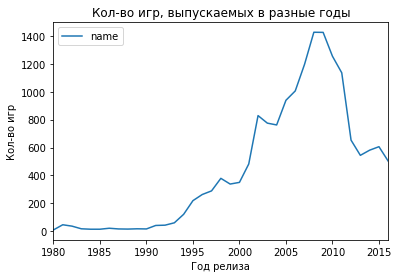

In [98]:
#построим линейный график по сводной таблице
data.pivot_table(index=['year_of_release'], values='name', aggfunc='count').plot()
plt.title('Кол-во игр, выпускаемых в разные годы')
plt.xlabel('Год релиза')
plt.ylabel('Кол-во игр');

С 2001 года кол-во выпускаемых игр резко возросло, наибольшее кол-во игр вышло в 2008-2009 гг, после этих годов выпуск игр идет на спад. За последние пять лет кол-во выпускаемых игр находятся примерно на одном уровне.  

Для дальнейшего исследования будем считать актуальным период с 2012 по 2016 гг.  


In [99]:
#создадим новую таблицу, в которую добавим игры только за 2012-2016 гг
data_2012_2016 = data.query('2012 <= year_of_release <= 2016')

#### Распределение продаж по годам  

- Посмотрим, сколько игр выпускалось в разные годы, а также как менялись продажи по платформам.

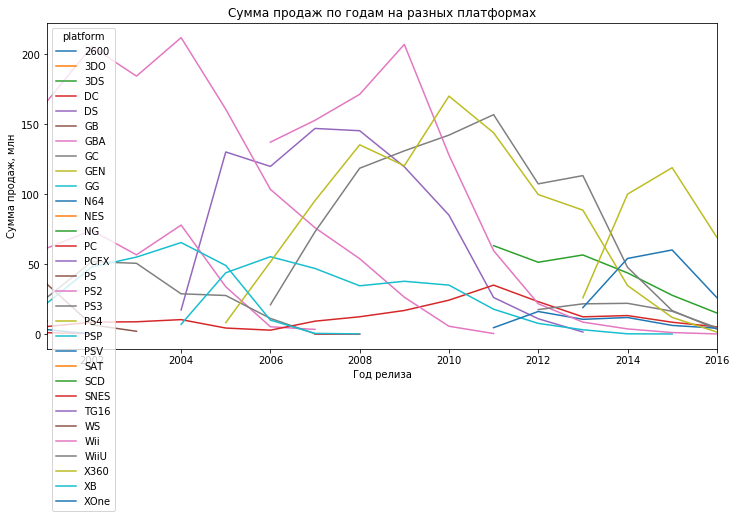

In [100]:
#строим линейные графики по кол-ву продаж по годам для каждой платформы
data.pivot_table(index=['year_of_release'], columns='platform', values='all_sales', aggfunc='sum')\
              .plot(xlim=(2001, 2016), figsize=(12,6))
plt.title('Сумма продаж по годам на разных платформах')
plt.xlabel('Год релиза')
plt.ylabel('Сумма продаж, млн');

В среднем платформы живут около 10 лет.  

Для наглядности построим график распределения продаж по годам в период только с 2012 по 2016 гг,  и выберем актуальные платформы с наибольшими продажами.

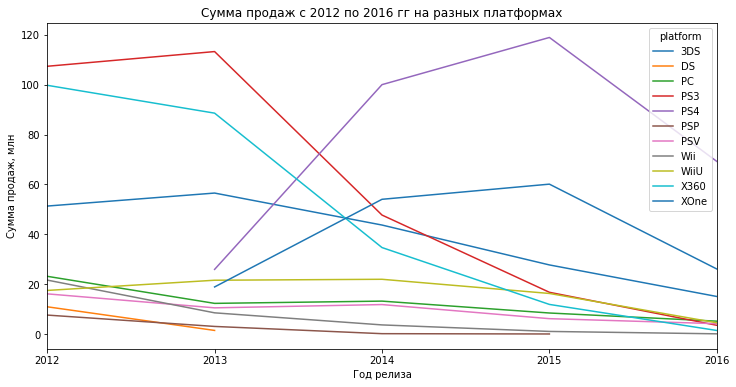

In [101]:
#строим линейные графики по кол-ву продаж по годам для каждой платформы
data_2012_2016.pivot_table(index=['year_of_release'], columns='platform', values='all_sales', aggfunc='sum')\
              .plot(xticks=(2012,2013,2014,2015,2016), figsize=(12,6))
plt.title('Сумма продаж с 2012 по 2016 гг на разных платформах')
plt.xlabel('Год релиза')
plt.ylabel('Сумма продаж, млн');

На графиках по сумме продаж выделяются платфрмы PS3, X360, 3DS, PS4 и XOne.    

PS3, X360 - высокие показатели за 2013 год, но продажи постоянно падают. Учитывая средний срок жизни платформы, можно предположить скорое исчезновение этих платформ. Не будем считать эти платформы актуальными.  

3DS, WiiU и PSV - молодые платформы, могут просуществовать еще несколько лет. Сумма продаж для WiiU и PSV примерно равна от года к году. 3DS хотя и показывает падение продаж к 2016 году, но такое падение характерно для всех платформ. Используем эти платформы для исследования.  

PC - очень "старая" платформа без выраженных колебаний суммы продаж за последние годы, оставим ее для исследования за ее долголетие.  

PS4 И XOne - самые молодые и развивающиеся платформы с наибольшими суммами продаж на 2016 год. 

3DS, WiiU, PSV, PC, PS4 И XOne можно назвать потенциально прибыльными платформами.

- Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Для этого создадим новую таблицу, в которую запишем только нужную нам информацию для дальнейшего исследования: актуальный период с 2012 по 2016 гг и перспективные платформы 3DS, WiiU, PSV, PC, PS4 И XOne.

In [102]:
#создадим список из актуальных для исследования платформ
platform_actual = ['3DS', 'WiiU', 'PSV', 'PC', 'PS4', 'XOne']
#создадим новую таблицу по актуальному периоду для платформ из списка
data_new = data_2012_2016.query('platform in @platform_actual').reset_index(drop=True)

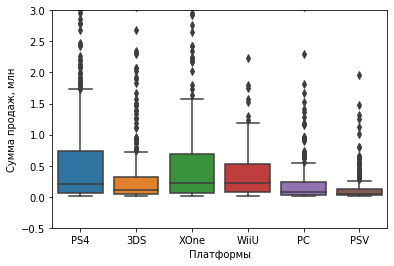

In [103]:
#выводим диаграмму "ящик с усами"для каждой платформы
sns.boxplot(x='platform', y='all_sales', data=data_new)
plt.ylim(-0.5,3)
plt.xlabel('Платформы')
plt.ylabel('Сумма продаж, млн');

Большая часть всех значений лежит в диапазоне до 1 млн.  

75% значений для платформ 3DS, PC и PSV лежат в пределах 0.5 млн.  

PS4 И XOne показывают самые высокие продажи.  

Медианные значения продаж для каждой платформы стремятся вниз, что говорит о том, что очень высоких значений не много.

#### Влияние отзывов пользователей и критиков на продажи по каждой платформе

1) Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами для платформы PS4.

In [104]:
#сохраним в новую таблицу строки для платформы PS4
data_ps4 = data_new.loc[data_new.loc[:,'platform'] == 'PS4']

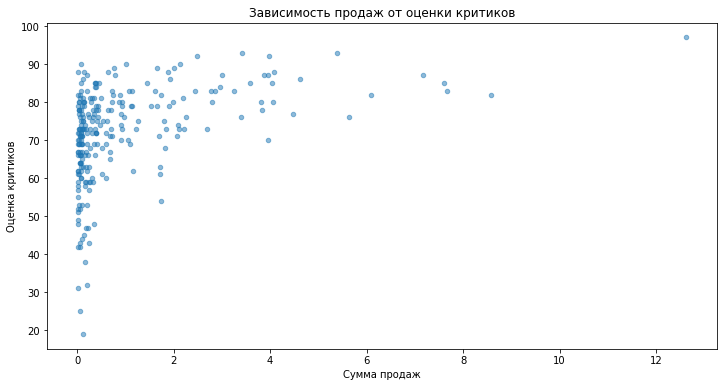

In [105]:
#построим диаграмму рассеяния для оценки зависимости от оценки критиков
data_ps4.plot(x='all_sales', y='critic_score', kind='scatter', figsize=(12,6), alpha=0.5)
plt.title('Зависимость продаж от оценки критиков')
plt.xlabel('Сумма продаж')
plt.ylabel('Оценка критиков');

In [106]:
data_ps4['all_sales'].corr(data_ps4['critic_score']) #найдем корреляцию

0.406567902061781

Коэффициент корреляции невысокий, линейная связь между отзывами и продажами отчетливо не прослеживается, основное кол-во значений сосредоточено в пределах 1 млн вне зависимости от оценки критиков. Но небольшая корреляция не влечет отсутствие связи как таковой, так как можно заметить, что самые большие продажи все таки у игр с высокой оценкой.

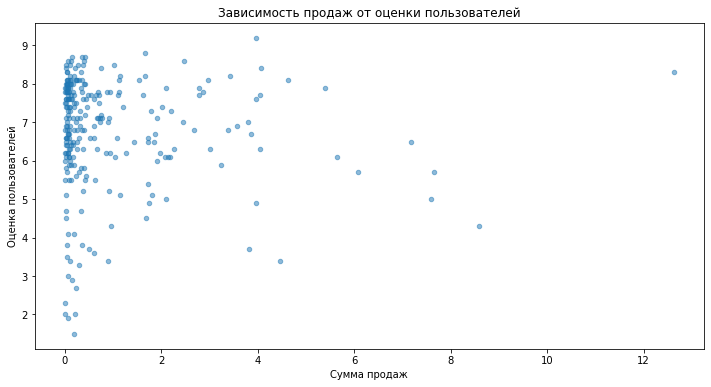

In [107]:
#построим диаграмму рассеяния для оценки зависимости от оценки пользователей
data_ps4.plot(x='all_sales', y='user_score', kind='scatter', figsize=(12,6), alpha=0.5)
plt.title('Зависимость продаж от оценки пользователей')
plt.xlabel('Сумма продаж')
plt.ylabel('Оценка пользователей');

In [108]:
data_ps4['all_sales'].corr(data_ps4['user_score']) #найдем корреляцию

-0.031957110204556376

Корреляция практически нулевая, на графике связь между продажами и пользовательскими оценками не прослеживается.

2) Соотнесем полученные выводы с продажами игр на платформах PC и WiiU.  

   - Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами для платформы PC.

In [109]:
#сохраним в новую таблицу строки для платформы PС
data_pс = data_new.loc[data_new.loc[:,'platform'] == 'PC']

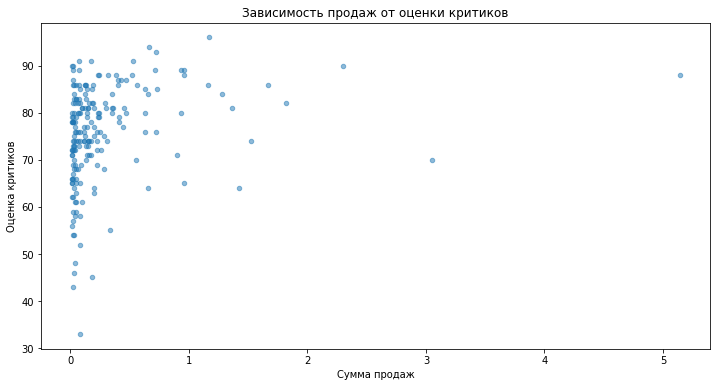

In [110]:
#построим диаграмму рассеяния для оценки зависимости от оценки критиков
data_pс.plot(x='all_sales', y='critic_score', kind='scatter', figsize=(12,6), alpha=0.5)
plt.title('Зависимость продаж от оценки критиков')
plt.xlabel('Сумма продаж')
plt.ylabel('Оценка критиков');

In [111]:
data_pс['all_sales'].corr(data_pс['critic_score']) #найдем корреляцию

0.23724324311567918

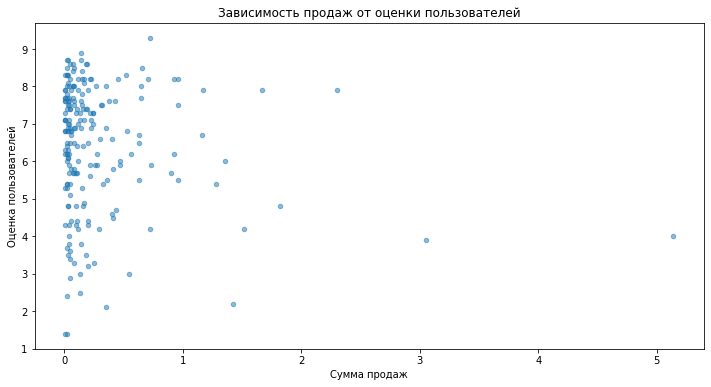

In [112]:
#построим диаграмму рассеяния для оценки зависимости от оценки пользователей
data_pс.plot(x='all_sales', y='user_score', kind='scatter', figsize=(12,6), alpha=0.5)
plt.title('Зависимость продаж от оценки пользователей')
plt.xlabel('Сумма продаж')
plt.ylabel('Оценка пользователей');

In [113]:
data_pс['all_sales'].corr(data_pс['user_score']) #найдем корреляцию

-0.12186747630735577

  - Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами для платформы WiiU.

In [114]:
#сохраним в новую таблицу строки для платформы WiiU
data_wiiu = data_new.loc[data_new.loc[:,'platform'] == 'WiiU']

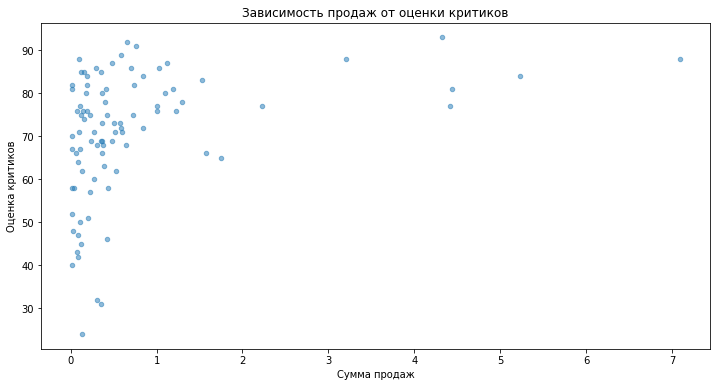

In [115]:
#построим диаграмму рассеяния для оценки зависимости от оценки критиков
data_wiiu.plot(x='all_sales', y='critic_score', kind='scatter', figsize=(12,6), alpha=0.5)
plt.title('Зависимость продаж от оценки критиков')
plt.xlabel('Сумма продаж')
plt.ylabel('Оценка критиков');

In [116]:
data_wiiu['all_sales'].corr(data_wiiu['critic_score']) #найдем корреляцию

0.3483797601201749

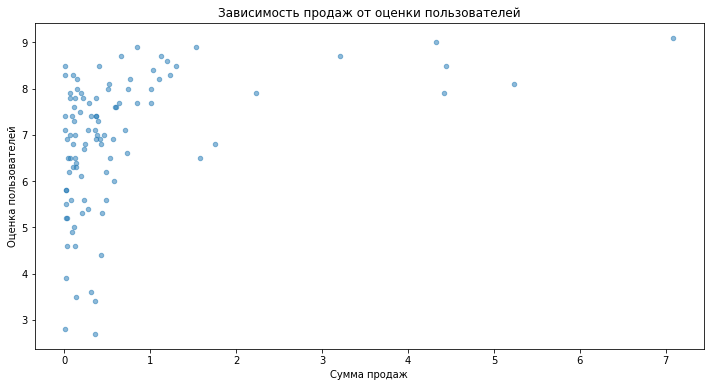

In [117]:
#построим диаграмму рассеяния для оценки зависимости от оценки пользователей
data_wiiu.plot(x='all_sales', y='user_score', kind='scatter', figsize=(12,6), alpha=0.5)
plt.title('Зависимость продаж от оценки пользователей')
plt.xlabel('Сумма продаж')
plt.ylabel('Оценка пользователей');

In [118]:
data_wiiu['all_sales'].corr(data_wiiu['user_score']) #найдем корреляцию

0.4002190202148617

Сравнивая диаграммы зависимости продаж от отзывов критиков и пользователей, получаем похожие выводы: небольшая связь прослеживается между продажами и оценкой критиков: чем выше оценка, тем больше продаж; не прослеживается связь между продажами и оценками пользователей для PS4 и PC, для платформы WiiU есть не высокая линейная зависимость: чем выше отзыв пользователей, тем больше продаж, что больше похоже на случайность, так как на этой платформе небольшое кол-во выпускаемых игр.

### Распределение игр по жанрам  <a id='6'></a>

Посмотрим на общее распределение игр по жанрам. Найдем самые прибыльные жанры и жанры с низкими продажами. Найдем медианные значения продаж.

In [119]:
#сгруппируем игры по жанрам и посчитаем кол-во игр и сумму продаж
data_2012_2016.groupby('genre').agg({'all_sales':['median','sum']})

all_sales        
                median     sum
genre                         
Action           0.120  441.12
Adventure        0.030   29.43
Fighting         0.130   44.49
Misc             0.120   85.04
Platform         0.210   61.00
Puzzle           0.045    4.89
Racing           0.140   53.50
Role-Playing     0.140  192.80
Shooter          0.440  304.73
Simulation       0.120   35.12
Sports           0.240  181.07
Strategy         0.080   13.34

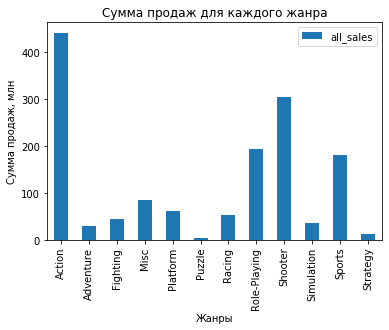

In [135]:
#построим график суммы продаж для наглядности
data_2012_2016.groupby('genre').agg({'all_sales':'sum'}).plot(kind='bar')
plt.title('Сумма продаж для каждого жанра')
plt.xlabel('Жанры')
plt.ylabel('Сумма продаж, млн');

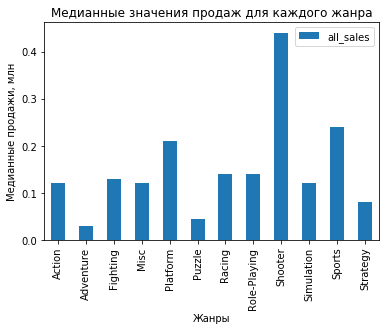

In [137]:
#построим график медианных значений продаж для наглядности
data_2012_2016.groupby('genre').agg({'all_sales':'median'}).plot(kind='bar')
plt.title('Медианные значения продаж для каждого жанра')
plt.xlabel('Жанры')
plt.ylabel('Медианные продажи, млн');

Самый продаваемый жанр Action. Следующие по кол-ву продаж Shooter, Role-Playing и Sports. Жанры с самыми низкими продажами Puzzle и Strategy.  

Но кол-во продаж не говорит о популярности жанра, так как весь успех могли обеспечить всего несколько игр, если сравнить медианные значения продаж, то самым популярным жанром оказывается Shooter, после него идут Sports и Platform. Не популярные жанры: Puzzle и Adventure.

### Портрет пользователя каждого региона  <a id='7'></a>

- Определим для каждого региона самые популярные платформы: посчитаем сумму продаж.

In [121]:
#сгруппируем игры по платформам и посчитаем сумму продаж для каждого региона
data_2012_2016.groupby('platform').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'})

,na_sales,eu_sales,jp_sales
platform,,,
3DS,55.31,42.64,87.79
DS,4.59,3.53,3.72
PC,19.12,37.76,0.00
PS3,103.38,106.86,35.29
PS4,108.74,141.09,15.96
PSP,0.13,0.42,10.47
PSV,10.98,11.36,21.04
Wii,17.45,11.92,3.39
WiiU,38.10,25.13,13.01


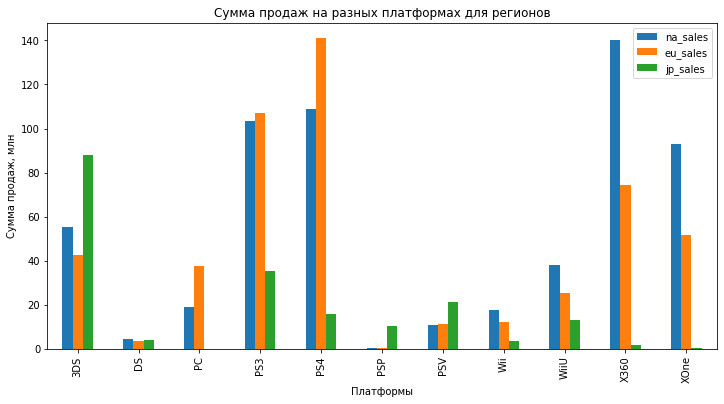

In [122]:
#построим график по кол-ву продаж на разных платформах для каждого региона
data_2012_2016.groupby('platform').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}).plot(kind='bar', figsize=(12,6))
plt.title('Сумма продаж на разных платформах для регионов')
plt.xlabel('Платформы')
plt.ylabel('Сумма продаж, млн');

**Топ-5 платформ:**  

для Северной Америки(NA) - X360, PS4, PS3, XOne, 3DS      
для Европы(EU) - PS4, PS3, X360, XOne, 3DS     
для Японии(JP) - 3DS, PS3, PSV, PS4, WiiU    

Самые большие продажи игр в Северной Америке и Европе. Доля продаж на японском рынке значительно ниже.  

Абсолютные лидеры во всех регионах платформы 3DS, PS3 и PS4.

Популярные в Северной Америке и Европе платформы X360 и XOne не пользуются популярностью в Японии. Вместо них в топ-5 вошли PSV и WiiU.

- Определим для каждого региона самые популярные жанры: посчитаем сумму продаж.

In [123]:
#сгруппируем игры по жанрам и посчитаем продажи для каждого региона
data_2012_2016.groupby('genre').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'})

,na_sales,eu_sales,jp_sales
genre,,,
Action,177.84,159.34,52.80
Adventure,8.92,9.46,8.24
Fighting,19.79,10.79,9.44
Misc,38.19,26.32,12.86
Platform,25.38,21.41,8.63
Puzzle,1.13,1.40,2.14
Racing,17.22,27.29,2.50
Role-Playing,64.00,48.53,65.44
Shooter,144.77,113.47,9.23


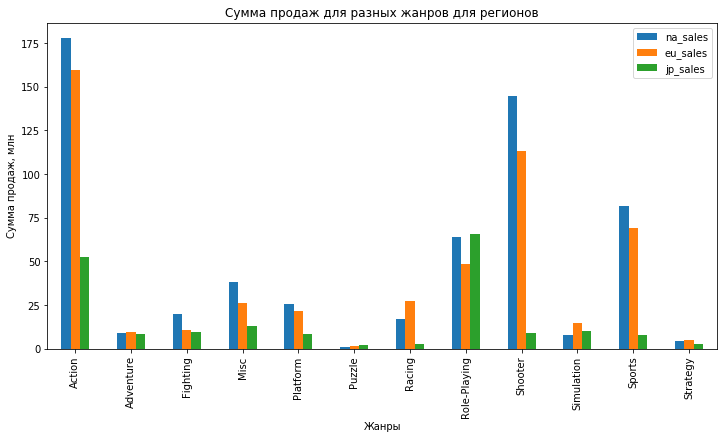

In [124]:
#построим график по кол-ву продаж разных жанров для каждого региона
data_2012_2016.groupby('genre').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'}).plot(kind='bar', figsize=(12,6))
plt.title('Сумма продаж для разных жанров для регионов')
plt.xlabel('Жанры')
plt.ylabel('Сумма продаж, млн');

**Топ-5 жанров:**  

для Северной Америки(NA) - Action, Shooter, Sports, Role-Playing и Misc  
для Европы(EU) - Action, Shooter, Sports, Role-Playing и Racing  
для Японии(JP) - Role-Playing, Action, Misc, Simulation, Fighting  

Самый популярный жанр для всех регионов Action, хотя в Японии он на втором месте.  

Топ-5 жанров для Северной Америки и Европы почти не отличается. В то время как в Японии пятерка самых продаваемых жанров совершенно другая: в нее вошли Simulation и Fighting.  

### Влияние рейтинга ESRB на продажи в отдельном регионе <a id='8'></a>

In [125]:
#сгруппируем игры по рейтингу ESRB и посчитаем продажи для каждого региона
data_2012_2016.groupby('rating').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum'})

,na_sales,eu_sales,jp_sales
rating,,,
E,114.37,113.03,28.33
E10+,75.70,55.37,8.19
M,231.57,193.96,21.20
T,66.02,52.96,26.02
unknow,103.31,91.50,108.84


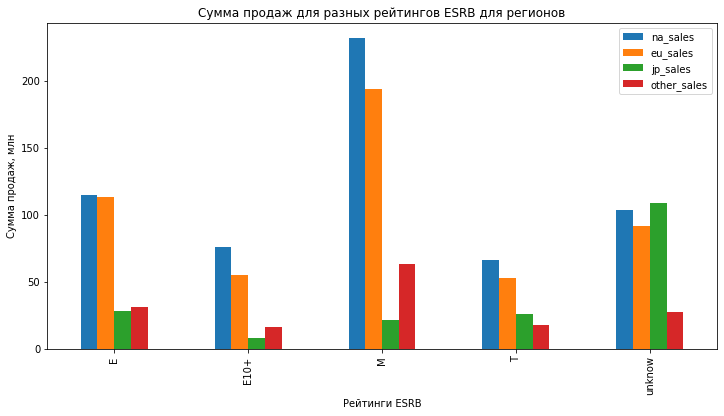

In [126]:
#построим график по кол-ву продаж для разных рейтингов ESRB для каждого региона
data_2012_2016.groupby('rating').agg({'na_sales':'sum', 'eu_sales':'sum', 'jp_sales':'sum', 'other_sales': 'sum'}).plot(kind='bar', figsize=(12,6))
plt.title('Сумма продаж для разных рейтингов ESRB для регионов')
plt.xlabel('Рейтинги ESRB')
plt.ylabel('Сумма продаж, млн');

Больше всего игр продается в сегменте с рейтингом «M» - «Для взрослых», но общее распределние по известным рейтингам во всех регионах одинаковое.  Рейтинг ESRB не влияет на продажи в отдельном регионе.  

Суммы продаж с неизвестным рейтингом отличаются, больше всего продаж с неизвестным рейтингом в Японии, возможно, потому что в Японии американская система рейтингов не так популярна.

### Вывод   

Определили актуальный период для исследования - 2012-2016 гг.  

На основе продаж выделили шесть потенциально прибыльных платформ: 3DS, WiiU, PSV, PC, PS4 И XOne.  

Изучили влияние оценки критиков и пользователей на продажи игр: прослеживается небольшое влияние оценки критиков - чем выше оценка, тем больше продаж; влияние оценки пользователей не прослеживается.  

Самыми прибыльными оказались жанры Action, Shooter, Role-Playing и Sports. Самую низкую прибыль показали жанры Puzzle и Strategy.  

Самый популярный жанр Shooter, после него идут Sports и Platform. Не популярные жанры: Puzzle и Adventure.  

Рынок Северной Америки и Европы очень похожи по популярности платформ и жанров. Японский рынок имеет свою специфику: топ-5 жанров сильно отличается от других регионов.  

Портрет пользователя:
- для Северной Америки и Европы: игры в жанре Action и Shooter на платформах X360, PS4 и PS3;
- для Японии: игры в жанре Role-Playing и Action на платформах 3DS и PS3.  

Самые популярные игры с рейтингом М - "Для взрослых". В целом рейтинг ESRB не влияет на продажи в разных регионах.

## Проверка гипотез <a id='9'></a>

#### Первая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые 

**Нулевая гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC равны.  
**Альтернативная гипотеза:** средние пользовательские рейтинги платформ Xbox One и PC не равны.    

Проведем t-тест для двух независимых выборок по платформам. Уровень статистической значимости зададим в 5%.

In [127]:
#создаем новую таблицу для XOne без пропусков в пользовательсих оценках
data_xone = data_2012_2016.loc[(data_2012_2016.loc[:,'platform'] == 'XOne') & (data_2012_2016.loc[:,'user_score'] > 0)]

In [128]:
#создаем новую таблицу для pc без пропусков в пользовательсих оценках
data_pc_second = data_2012_2016.loc[(data_2012_2016.loc[:,'platform'] == 'PC') & (data_2012_2016.loc[:,'user_score'] > 0)]

In [129]:
#посмотрим на размеры выборок
display(data_xone.shape[0])
display(data_pc_second.shape[0])

182

206

In [130]:
#проводим т-тест, выборки разные по размеру, установим параметр equal_var равный False
results = st.ttest_ind (data_xone['user_score'], data_pc_second['user_score'], equal_var=False)
results.pvalue

0.5489537965134912

Значение pvalue равно чуть больше 50%, что значительно выше уровня статистической значимости.  Полученные данные подтверждают нулевую гипотезу: средние пользовательские рейтинги платформ Xbox One и PC равны. Следовательно и первая гипотеза исследования подтверждена.

#### Вторая гипотеза : средние пользовательские рейтинги жанров Action и Sports разные.

**Нулевая гипотеза:** средние пользовательские рейтинги жанров Action и Sports равны.  
**Альтернативная гипотеза:** средние пользовательские рейтинги жанров Action и Sports не равны.    

Проведем t-тест для двух независимых выборок по платформам. Уровень статистической значимости зададим в 5%.

In [131]:
#создаем новую таблицу для жанра Action без пропусков в пользовательсих оценках
data_action = data_2012_2016.loc[(data_2012_2016.loc[:,'genre'] == 'Action') & (data_2012_2016.loc[:,'user_score'] > 0)]

In [132]:
#создаем новую таблицу для жанра Sports без пропусков в пользовательсих оценках
data_sports = data_2012_2016.loc[(data_2012_2016.loc[:,'genre'] == 'Sports') & (data_2012_2016.loc[:,'user_score'] > 0)]

In [133]:
#посмотрим на размеры выборок
display(data_action.shape[0])
display(data_sports.shape[0])

523

195

In [134]:
#проводим т-тест, выборки разные по размеру, установим параметр equal_var равный False
results = st.ttest_ind (data_action['user_score'], data_sports['user_score'], equal_var=False)
results.pvalue

4.24307776572644e-20

Мы получили pvalue в экспоненциальной форме записи числа, потому что у нас очень маленькое значение близкое к 0, а значит pvalue меньше уровня статистической значимости. Мы отвергаем нулевую гипотезу и принимаем альтернативную. Следовательно вторая гипотеза исследования подтверждена: средние пользовательские рейтинги жанров Action и Sports разные.

### Вывод  

Исследуемые данные подтвердили обе гипотезв нашего исследования.

## Итоги исследования <a id='10'></a>

Прежде чем исследовать данные и подтверждать гипотезы, мы ознакомились с данными, проверили их корректность, привели к единому стилю написание столбцов, заполнили пропуски, изменили некоторые типы данных, добавили столбец с недостающей информацией.  

Исследуя данные, определили что:  

- актуальный период для построения прогноза на 2017 г - промежуток между 2012 и 2016 гг;  
- средний срок жизни платформы составляет примерно 10 лет;  
- наиболее перспективные и прибыльные платформы: DS, WiiU, PSV, PC, PS4 И XOne;  
- существует небольшая связь между продажами и оценкой критиков: чем выше оценка, тем больше продаж, а вот связь между продажами и оценками пользователей не прослеживается;  
- самый популярный жанр Shooter, а самый прибыльный Action, не популярный жанр с самыми низкими продажами Puzzle;  
- североамериканский и европейский рынки похожи как по популярным платформам, так и по самым продаваемым жанрам, японский рынок отличается;
- больше всего игр продается в сегменте с рейтингом «Для взрослых», рейтинг ESRB не влияет на продажи в отдельном регионе.  

Исхода из полученных данных, проверили гипотезы:  

- Первая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC одинаковые - подтверждена.  
- Вторая гипотеза : средние пользовательские рейтинги жанров Action и Sports разные - подтверждена.
